In [7]:
import kagglehub

path = kagglehub.dataset_download("ananthu017/emotion-detection-fer")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\hp\.cache\kagglehub\datasets\ananthu017\emotion-detection-fer\versions\1


In [8]:
import os
# print(os.listdir(path))

for item in os.listdir(path):
  item_path = os.path.join(path, item)
  if os.path.isdir(item_path):
    print(f'---{item}')
    print(os.listdir(item_path))

---test
['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
---train
['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [9]:
import tensorflow as tf
import numpy as np

item_path = os.path.join(path, 'train')
train_data = tf.keras.utils.image_dataset_from_directory(item_path , batch_size=1000)

# print(type(train_data)) # tensorflow.python.data.ops.prefetch_op._PrefetchDataset

# for i in train_data:
#   print(type(i)) # tuple
#   print(i[1])
#   break

print(len(train_data))


Found 28709 files belonging to 7 classes.
29


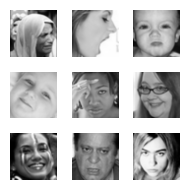

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(2, 2))

for images , labels in train_data.take(1):
  for i in range(1,10):
    # print(images.shape)
    # print(np.unique(labels))
    image = images[i].numpy().astype('uint8')
    label = labels[i].numpy().astype('uint8')
    # print(image)
    plt.subplot(3,3,i)
    plt.imshow(image)
    plt.xlabel(label)
    plt.axis("off")
    
plt.tight_layout()
plt.show()
